#### Library Imports

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

**Loading** data and looking at some plots

4431872/4422102 [==============================] - 0s 0us/step


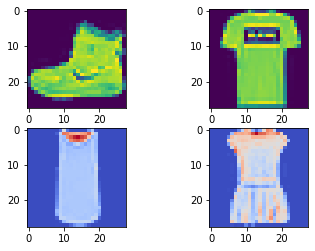

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# plot 4 images as subplots
plt.subplot(221)
plt.imshow(X_train[0])
plt.subplot(222)
plt.imshow(X_train[1])
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('coolwarm'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('coolwarm'))
# show the plot
plt.show()


In [3]:
print("X_train Shape is:" , (X_train.shape))
print("X_test Shape is:" , (X_test.shape))
print("y_train Shape is:" , (y_train.shape))
print("y_test Shape is:" , (y_test.shape))



X_train Shape is: (60000, 28, 28)
X_test Shape is: (10000, 28, 28)
y_train Shape is: (60000,)
y_test Shape is: (10000,)


In [4]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# np.random.seed  an essential input that enables NumPy to generate pseudo-random numbers for random processes.


[Check out this source for a better understanding  of why we use np.random.seed](https://www.sharpsightlabs.com/blog/numpy-random-seed/)

In [5]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]




11501568/11490434 [==============================] - 0s 0us/step


In [6]:
# define baseline model
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 9s - loss: 0.2810 - accuracy: 0.9212 - val_loss: 0.1346 - val_accuracy: 0.9622 - 9s/epoch - 29ms/step
Epoch 2/10
300/300 - 5s - loss: 0.1111 - accuracy: 0.9677 - val_loss: 0.0986 - val_accuracy: 0.9702 - 5s/epoch - 15ms/step
Epoch 3/10
300/300 - 4s - loss: 0.0706 - accuracy: 0.9798 - val_loss: 0.0800 - val_accuracy: 0.9755 - 4s/epoch - 15ms/step
Epoch 4/10
300/300 - 5s - loss: 0.0503 - accuracy: 0.9858 - val_loss: 0.0718 - val_accuracy: 0.9782 - 5s/epoch - 15ms/step
Epoch 5/10
300/300 - 5s - loss: 0.0361 - accuracy: 0.9902 - val_loss: 0.0707 - val_accuracy: 0.9778 - 5s/epoch - 15ms/step
Epoch 6/10
300/300 - 5s - loss: 0.0270 - accuracy: 0.9932 - val_loss: 0.0629 - val_accuracy: 0.9806 - 5s/epoch - 15ms/step
Epoch 7/10
300/300 - 4s - loss: 0.0205 - accuracy: 0.9948 - val_loss: 0.0604 - val_accuracy: 0.9802 - 4s/epoch - 15ms/step
Epoch 8/10
300/300 - 4s - loss: 0.0145 - accuracy: 0.9966 - val_loss: 0.0597 - val_accuracy: 0.9815 - 4s/epoch - 15ms/step
Epoch 9/10
300/3